<a href="https://colab.research.google.com/github/Danna-Bustacara/-Dimplomado_Ciencia_Datos/blob/main/DESEMPLEO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***SERIE DESEMPLEO***


In [4]:
from __future__ import print_function
import os
import sys
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import datetime
import math
from statsmodels.datasets import sunspots
from statsmodels.tsa.deterministic import Seasonality
import scipy as sp
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from scipy import stats
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.seasonal import seasonal_decompose
rcParams['figure.figsize'] = 15, 10
from pandas.plotting import register_matplotlib_converters
import plotly.express as px
import plotly.graph_objects as go
import random
import statsmodels.api as sm
import datetime as dt
import seaborn as sns
import scipy as sp
import scipy.stats
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy.special import inv_boxcox
from pandas.core.frame import DataFrame
import tensorflow as tf
import tensorflow.keras as keras

In [5]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [6]:
Desempleo=Desempleo2=pd.read_excel("/content/drive/Shareddrives/Eduardo/tasa_desempleo.xlsx", names=['Fecha', 'ocupación','desempleo'])
Desempleo=Desempleo2 = Desempleo2.drop('ocupación', axis=1)
Desempleo['Fecha']=pd.to_datetime(Desempleo['Fecha'])
Desempleo=Desempleo.set_index('Fecha')
print(type(Desempleo))

Desempleo_ts=Desempleo['desempleo']
print(type(Desempleo_ts))
Desempleo_ts.index.freq='MS'


<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


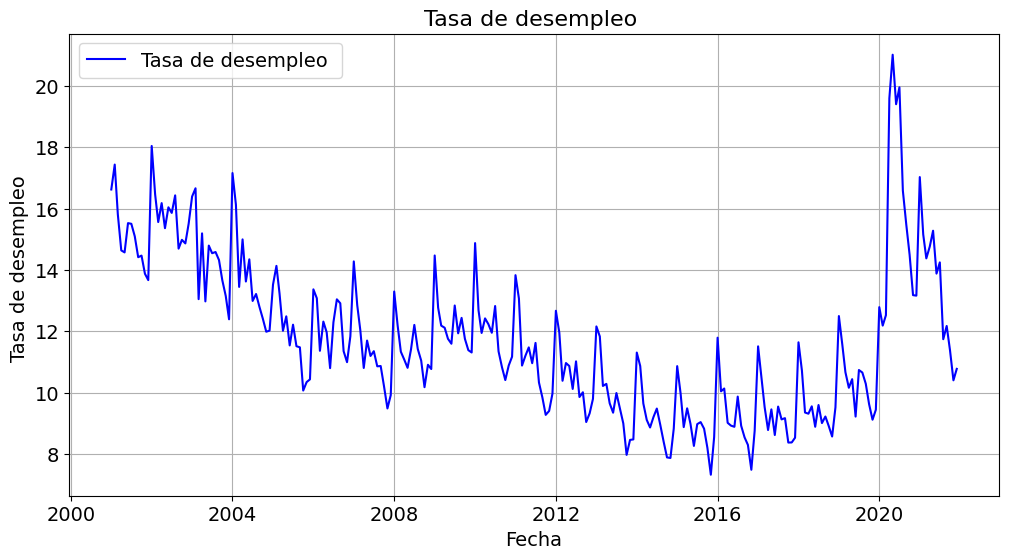

In [7]:
plt.rc('font', size=14)
plt.rc('axes', titlesize=16)
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(Desempleo_ts, color='b', label='Tasa de desempleo ')
ax.set_xlabel('Fecha')
ax.set_ylabel('Tasa de desempleo ')
ax.set_title('Tasa de desempleo ')
ax.grid(True)
ax.legend(loc='upper left');

Una caracteristica muy importante a tener en cuenta para el modelamiento de series de tiempo con árboles, es que se recomienda que se haga con la serie sin tendencia.

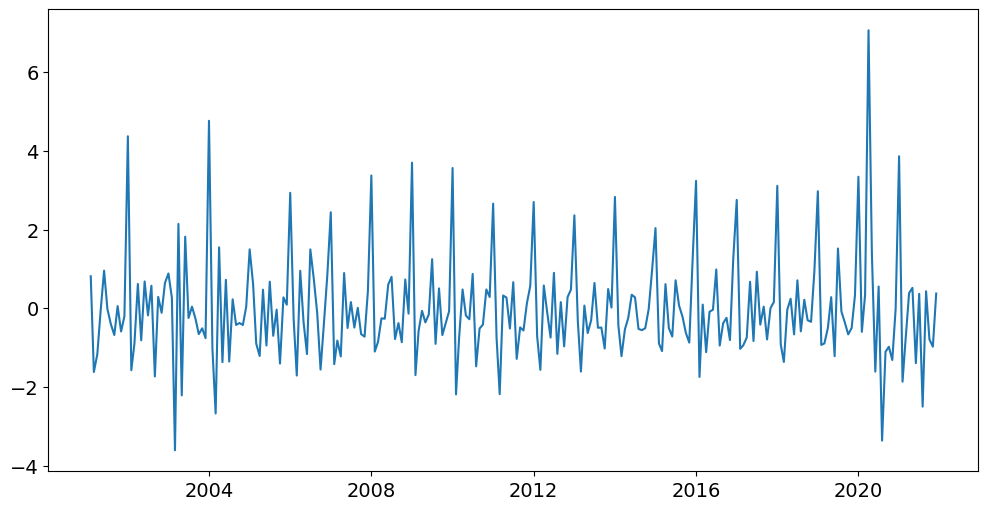

In [8]:
#### Serie diferenciada ####
dif_Desempleo=Desempleo.diff(periods=1)[1:]
DesempsinTend=dif_Desempleo
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(dif_Desempleo, '-', label="Serie Diferenciada")

Se crea una variable explicativa que se debe incluir, esa variable explicativa tiene como objetivo concierar la estacionalidad. Los vala

In [9]:
seas_gen = Seasonality(12)
a=seas_gen.in_sample(Desempleo.index).iloc[:,0:12]
PasTrans=pd.DataFrame(DesempsinTend)

In [10]:
dfPas=DataFrame()

for i in range(12,0,-1):
    dfPas[['t-'+str(i)]] = PasTrans.shift(i)


dfPas=pd.concat([dfPas, a],axis=1)
dfPas=dfPas.iloc[1:]

In [11]:
dfPas['t'] = PasTrans.values
dfPas

,t-12,t-11,t-10,t-9,t-8,t-7,t-6,t-5,t-4,t-3,...,"s(4,12)","s(5,12)","s(6,12)","s(7,12)","s(8,12)","s(9,12)","s(10,12)","s(11,12)","s(12,12)",t
Fecha,,,,,,,,,,,,,,,,,,,,,
2001-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.811900
2001-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.622300
2001-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.173800
2001-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.811900,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.065200
2001-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.811900,-1.622300,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.953900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-01,-3.366735,-1.108911,-0.980020,-1.316680,-0.015845,3.863168,-1.868475,-0.780697,0.383506,0.517443,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-2.502357
2021-09-01,-1.108911,-0.980020,-1.316680,-0.015845,3.863168,-1.868475,-0.780697,0.383506,0.517443,-1.397227,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.431571
2021-10-01,-0.980020,-1.316680,-0.015845,3.863168,-1.868475,-0.780697,0.383506,0.517443,-1.397227,0.365409,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.792696


In [12]:
dfPas_PRES = dfPas[12:]
print(dfPas_PRES.head(7))
dfPas_PRES.shape

PRESsplitPas = dfPas_PRES.values
XPas= PRESsplitPas[:, 0:-1]
yPas =PRESsplitPas[:,-1]

              t-12    t-11    t-10     t-9     t-8     t-7     t-6     t-5  \
Fecha                                                                        
2002-02-01  0.8119 -1.6223 -1.1738 -0.0652  0.9539 -0.0222 -0.4070 -0.6817   
2002-03-01 -1.6223 -1.1738 -0.0652  0.9539 -0.0222 -0.4070 -0.6817  0.0531   
2002-04-01 -1.1738 -0.0652  0.9539 -0.0222 -0.4070 -0.6817  0.0531 -0.5924   
2002-05-01 -0.0652  0.9539 -0.0222 -0.4070 -0.6817  0.0531 -0.5924 -0.2070   
2002-06-01  0.9539 -0.0222 -0.4070 -0.6817  0.0531 -0.5924 -0.2070  4.3707   
2002-07-01 -0.0222 -0.4070 -0.6817  0.0531 -0.5924 -0.2070  4.3707 -1.5763   
2002-08-01 -0.4070 -0.6817  0.0531 -0.5924 -0.2070  4.3707 -1.5763 -0.9019   

               t-4     t-3  ...  s(4,12)  s(5,12)  s(6,12)  s(7,12)  s(8,12)  \
Fecha                       ...                                                
2002-02-01  0.0531 -0.5924  ...      0.0      0.0      0.0      0.0      0.0   
2002-03-01 -0.5924 -0.2070  ...      0.0      0.0      0.

(239, 25)

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

XPas_train_full, XPas_test, yPas_train_full, yPas_test=train_test_split(XPas,yPas,test_size=0.15, train_size=0.85,shuffle=False)
XPas_train, XPas_val, yPas_train, yPas_val=train_test_split(XPas_train_full,yPas_train_full,test_size=0.15, train_size=0.85,shuffle=False)

scaler=MinMaxScaler()
XPas_train=scaler.fit_transform(XPas_train)
XPas_val=scaler.transform(XPas_val)
XPas_test=scaler.transform(XPas_test)
XPas_train_full=scaler.transform(XPas_train_full)

print('Observations for feature: %d' % (len(Desempleo)))
print('Training Observations for feature: %d' % (len(XPas_train)))
print('Validation Observations for feature: %d' % (len(XPas_val)))
print('Testing Observations for feature: %d' % (len(XPas_test)))

Observations for feature: 252
Training Observations for feature: 172
Validation Observations for feature: 31
Testing Observations for feature: 36


In [14]:
decision_tree_Pas = DecisionTreeRegressor()  # max-depth not set

# Fit the model to the training features(covariables) and targets(respuestas)
decision_tree_Pas.fit(XPas_train, yPas_train)

# Check the score on train and test
print("Coeficiente R2 sobre el conjunto de entrenamiento:",decision_tree_Pas.score(XPas_train, yPas_train))
print("Coeficiente R2 sobre el conjunto de validación:",decision_tree_Pas.score(XPas_val,yPas_val))
print("el RECM es:",(((decision_tree_Pas.predict(XPas_val)-yPas_val)**2).sum())**0.5)


DecisionTreeRegressor()

Coeficiente R2 sobre el conjunto de entrenamiento: 1.0
Coeficiente R2 sobre el conjunto de validación: 0.43470251850661445
el RECM es: 4.263567054818419


In [15]:
from sklearn.metrics import mean_squared_error
for d in [2, 3, 4, 5,6,7,8,9,10, 11, 12]:
    # Create the tree and fit it
    decision_tree_Pas = DecisionTreeRegressor(max_depth=d)
    decision_tree_Pas.fit(XPas_train, yPas_train)

    # Print out the scores on train and test
    print('max_depth=', str(d))
    print("Coeficiente R2 sobre el conjunto de entrenamiento:",decision_tree_Pas.score(XPas_train, yPas_train))
    print("Coeficiente R2 sobre el conjunto de validación:",decision_tree_Pas.score(XPas_val, yPas_val))
    print("el RECM sobre el conjunto de validación es:", mean_squared_error(decision_tree_Pas.predict(XPas_val),yPas_val, squared=False), '\n')

DecisionTreeRegressor(max_depth=2)

max_depth= 2
Coeficiente R2 sobre el conjunto de entrenamiento: 0.5950566477323537
Coeficiente R2 sobre el conjunto de validación: 0.6246057465718725
el RECM sobre el conjunto de validación es: 0.6240186010475643 



DecisionTreeRegressor(max_depth=3)

max_depth= 3
Coeficiente R2 sobre el conjunto de entrenamiento: 0.6826228307759579
Coeficiente R2 sobre el conjunto de validación: 0.6578284882374545
el RECM sobre el conjunto de validación es: 0.5957659109672407 



DecisionTreeRegressor(max_depth=4)

max_depth= 4
Coeficiente R2 sobre el conjunto de entrenamiento: 0.7617601243200157
Coeficiente R2 sobre el conjunto de validación: 0.6494591512093797
el RECM sobre el conjunto de validación es: 0.6030079563325045 



DecisionTreeRegressor(max_depth=5)

max_depth= 5
Coeficiente R2 sobre el conjunto de entrenamiento: 0.8403961815458479
Coeficiente R2 sobre el conjunto de validación: 0.533543547627964
el RECM sobre el conjunto de validación es: 0.695599526889726 



DecisionTreeRegressor(max_depth=6)

max_depth= 6
Coeficiente R2 sobre el conjunto de entrenamiento: 0.8888151041679737
Coeficiente R2 sobre el conjunto de validación: 0.5377906854846821
el RECM sobre el conjunto de validación es: 0.692425529957329 



DecisionTreeRegressor(max_depth=7)

max_depth= 7
Coeficiente R2 sobre el conjunto de entrenamiento: 0.9331118299333503
Coeficiente R2 sobre el conjunto de validación: 0.5278290689435317
el RECM sobre el conjunto de validación es: 0.6998473922881469 



DecisionTreeRegressor(max_depth=8)

max_depth= 8
Coeficiente R2 sobre el conjunto de entrenamiento: 0.9631886810317258
Coeficiente R2 sobre el conjunto de validación: 0.5273897212440233
el RECM sobre el conjunto de validación es: 0.7001729151331165 



DecisionTreeRegressor(max_depth=9)

max_depth= 9
Coeficiente R2 sobre el conjunto de entrenamiento: 0.9777547511186554
Coeficiente R2 sobre el conjunto de validación: 0.5351419976913163
el RECM sobre el conjunto de validación es: 0.6944066660293254 



DecisionTreeRegressor(max_depth=10)

max_depth= 10
Coeficiente R2 sobre el conjunto de entrenamiento: 0.9850143401773643
Coeficiente R2 sobre el conjunto de validación: 0.44831257051150775
el RECM sobre el conjunto de validación es: 0.7564849105980972 



DecisionTreeRegressor(max_depth=11)

max_depth= 11
Coeficiente R2 sobre el conjunto de entrenamiento: 0.9923772872026789
Coeficiente R2 sobre el conjunto de validación: 0.39683196026238354
el RECM sobre el conjunto de validación es: 0.7909934480378229 



DecisionTreeRegressor(max_depth=12)

max_depth= 12
Coeficiente R2 sobre el conjunto de entrenamiento: 0.9974108861329645
Coeficiente R2 sobre el conjunto de validación: 0.4826631392427785
el RECM sobre el conjunto de validación es: 0.7325553377639487 



Se hace una elección de profundidad 3, es el valor que maximiza el coeficiente R2 en conjuntos de entrenamiento y validación y minimiza el RECM

In [16]:
path=decision_tree_Pas.cost_complexity_pruning_path(XPas_train, yPas_train)
alphas=path['ccp_alphas']
print(alphas)
print(alphas.min())

print(alphas.max())
div=15

[0.00000000e+00 1.61240552e-08 2.27189960e-08 3.83949427e-08
 3.99599308e-08 1.65622736e-07 1.72291042e-07 2.91598487e-07
 3.32064416e-07 3.65983941e-07 1.19606752e-06 1.24961130e-06
 1.98269210e-06 2.14630206e-06 2.73415241e-06 3.26626890e-06
 3.39993832e-06 3.61295536e-06 5.10707396e-06 5.15581845e-06
 5.80387265e-06 6.71061639e-06 8.22563935e-06 8.38459386e-06
 9.02835345e-06 9.94840116e-06 1.29466942e-05 1.42733348e-05
 1.43585207e-05 1.50137685e-05 1.64390698e-05 1.67657381e-05
 1.78215111e-05 2.11957108e-05 2.55869643e-05 3.13440068e-05
 4.08376490e-05 4.71086239e-05 5.31273600e-05 5.56028629e-05
 6.07487076e-05 6.83371058e-05 6.91178563e-05 7.39523735e-05
 8.15599675e-05 9.57133905e-05 9.63916749e-05 9.84512593e-05
 1.11461480e-04 1.15845272e-04 1.18769390e-04 1.56777886e-04
 1.57546047e-04 1.64702200e-04 1.68921186e-04 1.79236006e-04
 1.80477260e-04 1.88572141e-04 2.10428041e-04 2.12232674e-04
 2.17602374e-04 2.31189682e-04 2.47997293e-04 2.94726392e-04
 3.11981860e-04 3.152214

In [17]:
accuracy_train,accuracy_test=[],[]
for i in alphas:
    tree=DecisionTreeRegressor(ccp_alpha=i)

    tree.fit(XPas_train, yPas_train)
    y_train_pred=tree.predict(XPas_train)
    y_test_pred=tree.predict(XPas_test)


    accuracy_train.append(mean_squared_error(y_train_pred, yPas_train, squared=False))
    accuracy_test.append(mean_squared_error(y_test_pred, yPas_test,squared=False))

DecisionTreeRegressor()

DecisionTreeRegressor(ccp_alpha=1.6124055229801786e-08)

DecisionTreeRegressor(ccp_alpha=2.2718996018446398e-08)

DecisionTreeRegressor(ccp_alpha=3.839494268805784e-08)

DecisionTreeRegressor(ccp_alpha=3.995993079325023e-08)

DecisionTreeRegressor(ccp_alpha=1.6562273607359318e-07)

DecisionTreeRegressor(ccp_alpha=1.7229104249798418e-07)

DecisionTreeRegressor(ccp_alpha=2.9159848747708597e-07)

DecisionTreeRegressor(ccp_alpha=3.320644156925122e-07)

DecisionTreeRegressor(ccp_alpha=3.6598394116973e-07)

DecisionTreeRegressor(ccp_alpha=1.1960675233794726e-06)

DecisionTreeRegressor(ccp_alpha=1.2496112999100794e-06)

DecisionTreeRegressor(ccp_alpha=1.982692101119165e-06)

DecisionTreeRegressor(ccp_alpha=2.146302062202152e-06)

DecisionTreeRegressor(ccp_alpha=2.7341524062882084e-06)

DecisionTreeRegressor(ccp_alpha=3.266268897234413e-06)

DecisionTreeRegressor(ccp_alpha=3.3999383220962388e-06)

DecisionTreeRegressor(ccp_alpha=3.6129553587369475e-06)

DecisionTreeRegressor(ccp_alpha=5.107073958350018e-06)

DecisionTreeRegressor(ccp_alpha=5.155818447655483e-06)

DecisionTreeRegressor(ccp_alpha=5.803872654739129e-06)

DecisionTreeRegressor(ccp_alpha=6.710616385467425e-06)

DecisionTreeRegressor(ccp_alpha=8.225639345252398e-06)

DecisionTreeRegressor(ccp_alpha=8.384593856338467e-06)

DecisionTreeRegressor(ccp_alpha=9.028353450453732e-06)

DecisionTreeRegressor(ccp_alpha=9.948401162790904e-06)

DecisionTreeRegressor(ccp_alpha=1.2946694239948265e-05)

DecisionTreeRegressor(ccp_alpha=1.4273334752710781e-05)

DecisionTreeRegressor(ccp_alpha=1.4358520669013845e-05)

DecisionTreeRegressor(ccp_alpha=1.5013768509394778e-05)

DecisionTreeRegressor(ccp_alpha=1.6439069767442345e-05)

DecisionTreeRegressor(ccp_alpha=1.6765738140442967e-05)

DecisionTreeRegressor(ccp_alpha=1.7821511115212722e-05)

DecisionTreeRegressor(ccp_alpha=2.1195710836912118e-05)

DecisionTreeRegressor(ccp_alpha=2.5586964345973158e-05)

DecisionTreeRegressor(ccp_alpha=3.13440068121171e-05)

DecisionTreeRegressor(ccp_alpha=4.0837649035684655e-05)

DecisionTreeRegressor(ccp_alpha=4.710862393805481e-05)

DecisionTreeRegressor(ccp_alpha=5.3127359991104466e-05)

DecisionTreeRegressor(ccp_alpha=5.560286290872465e-05)

DecisionTreeRegressor(ccp_alpha=6.074870760922509e-05)

DecisionTreeRegressor(ccp_alpha=6.833710583580496e-05)

DecisionTreeRegressor(ccp_alpha=6.911785629922213e-05)

DecisionTreeRegressor(ccp_alpha=7.39523734591401e-05)

DecisionTreeRegressor(ccp_alpha=8.155996750763e-05)

DecisionTreeRegressor(ccp_alpha=9.571339051682828e-05)

DecisionTreeRegressor(ccp_alpha=9.639167487768189e-05)

DecisionTreeRegressor(ccp_alpha=9.845125926603263e-05)

DecisionTreeRegressor(ccp_alpha=0.00011146147996108513)

DecisionTreeRegressor(ccp_alpha=0.00011584527162430936)

DecisionTreeRegressor(ccp_alpha=0.00011876938953488514)

DecisionTreeRegressor(ccp_alpha=0.00015677788557674185)

DecisionTreeRegressor(ccp_alpha=0.00015754604651162457)

DecisionTreeRegressor(ccp_alpha=0.00016470220004375911)

DecisionTreeRegressor(ccp_alpha=0.000168921185894047)

DecisionTreeRegressor(ccp_alpha=0.0001792360062832542)

DecisionTreeRegressor(ccp_alpha=0.00018047726001156817)

DecisionTreeRegressor(ccp_alpha=0.0001885721413863175)

DecisionTreeRegressor(ccp_alpha=0.0002104280407543226)

DecisionTreeRegressor(ccp_alpha=0.00021223267441860576)

DecisionTreeRegressor(ccp_alpha=0.00021760237394870038)

DecisionTreeRegressor(ccp_alpha=0.00023118968185912924)

DecisionTreeRegressor(ccp_alpha=0.00024799729292588745)

DecisionTreeRegressor(ccp_alpha=0.0002947263920106691)

DecisionTreeRegressor(ccp_alpha=0.000311981860465119)

DecisionTreeRegressor(ccp_alpha=0.0003152214260362887)

DecisionTreeRegressor(ccp_alpha=0.0003292092232997201)

DecisionTreeRegressor(ccp_alpha=0.00033064302929060156)

DecisionTreeRegressor(ccp_alpha=0.0003840534570956897)

DecisionTreeRegressor(ccp_alpha=0.0004508393422960636)

DecisionTreeRegressor(ccp_alpha=0.0005331040687183034)

DecisionTreeRegressor(ccp_alpha=0.0005638541932802825)

DecisionTreeRegressor(ccp_alpha=0.0005806046947674358)

DecisionTreeRegressor(ccp_alpha=0.0006304690280289026)

DecisionTreeRegressor(ccp_alpha=0.0007466915985252008)

DecisionTreeRegressor(ccp_alpha=0.00082086837209303)

DecisionTreeRegressor(ccp_alpha=0.0008212251550387608)

DecisionTreeRegressor(ccp_alpha=0.0008424388542929593)

DecisionTreeRegressor(ccp_alpha=0.0008436577574870874)

DecisionTreeRegressor(ccp_alpha=0.000849664605307996)

DecisionTreeRegressor(ccp_alpha=0.0008886268677246133)

DecisionTreeRegressor(ccp_alpha=0.0009108312473212676)

DecisionTreeRegressor(ccp_alpha=0.0009763079266051756)

DecisionTreeRegressor(ccp_alpha=0.0009797315361536757)

DecisionTreeRegressor(ccp_alpha=0.0010439097373223767)

DecisionTreeRegressor(ccp_alpha=0.001067510651064561)

DecisionTreeRegressor(ccp_alpha=0.0010919953779067802)

DecisionTreeRegressor(ccp_alpha=0.0011118298715130349)

DecisionTreeRegressor(ccp_alpha=0.0011559300331236812)

DecisionTreeRegressor(ccp_alpha=0.001176604227223556)

DecisionTreeRegressor(ccp_alpha=0.0013676868870778334)

DecisionTreeRegressor(ccp_alpha=0.0013789550472390363)

DecisionTreeRegressor(ccp_alpha=0.001385526708800423)

DecisionTreeRegressor(ccp_alpha=0.001402966503433926)

DecisionTreeRegressor(ccp_alpha=0.0014376923228031518)

DecisionTreeRegressor(ccp_alpha=0.0017415767423087977)

DecisionTreeRegressor(ccp_alpha=0.0017588389391365805)

DecisionTreeRegressor(ccp_alpha=0.0025773711088973735)

DecisionTreeRegressor(ccp_alpha=0.00271840171533166)

DecisionTreeRegressor(ccp_alpha=0.003169970923497954)

DecisionTreeRegressor(ccp_alpha=0.0031856652066864196)

DecisionTreeRegressor(ccp_alpha=0.0032706192328428828)

DecisionTreeRegressor(ccp_alpha=0.0034716744536699017)

DecisionTreeRegressor(ccp_alpha=0.003546676961029746)

DecisionTreeRegressor(ccp_alpha=0.0035473539235037943)

DecisionTreeRegressor(ccp_alpha=0.003627419033165486)

DecisionTreeRegressor(ccp_alpha=0.003989403901133056)

DecisionTreeRegressor(ccp_alpha=0.0040363055029931415)

DecisionTreeRegressor(ccp_alpha=0.004167404354284462)

DecisionTreeRegressor(ccp_alpha=0.004334154451129566)

DecisionTreeRegressor(ccp_alpha=0.004713595949053162)

DecisionTreeRegressor(ccp_alpha=0.004971585546505744)

DecisionTreeRegressor(ccp_alpha=0.005178767091180439)

DecisionTreeRegressor(ccp_alpha=0.005536988316751881)

DecisionTreeRegressor(ccp_alpha=0.005654560483081235)

DecisionTreeRegressor(ccp_alpha=0.007390134858821418)

DecisionTreeRegressor(ccp_alpha=0.007431723997780229)

DecisionTreeRegressor(ccp_alpha=0.007615575483861882)

DecisionTreeRegressor(ccp_alpha=0.007628067225772365)

DecisionTreeRegressor(ccp_alpha=0.007866669377579742)

DecisionTreeRegressor(ccp_alpha=0.00894945398113289)

DecisionTreeRegressor(ccp_alpha=0.010214117770773943)

DecisionTreeRegressor(ccp_alpha=0.011558050341016566)

DecisionTreeRegressor(ccp_alpha=0.012726630961185256)

DecisionTreeRegressor(ccp_alpha=0.013415714519674243)

DecisionTreeRegressor(ccp_alpha=0.013819156288847124)

DecisionTreeRegressor(ccp_alpha=0.016698801536450293)

DecisionTreeRegressor(ccp_alpha=0.018808969837860748)

DecisionTreeRegressor(ccp_alpha=0.021429561462894778)

DecisionTreeRegressor(ccp_alpha=0.022362916062107316)

DecisionTreeRegressor(ccp_alpha=0.026410898042223935)

DecisionTreeRegressor(ccp_alpha=0.029714349550882)

DecisionTreeRegressor(ccp_alpha=0.031295937280695366)

DecisionTreeRegressor(ccp_alpha=0.03446934460169558)

DecisionTreeRegressor(ccp_alpha=0.04340778876286429)

DecisionTreeRegressor(ccp_alpha=0.0651200015515605)

DecisionTreeRegressor(ccp_alpha=0.1305125956150729)

DecisionTreeRegressor(ccp_alpha=0.7129808114356935)

<Figure size 1400x700 with 0 Axes>

<Axes: >

<Axes: >

([<matplotlib.axis.XTick at 0x7f72bb22e020>,
 [Text(0.0, 0, '0.0000'),
  Text(0.0475320540957129, 0, '0.0475'),
  Text(0.0950641081914258, 0, '0.0951'),
  Text(0.1425961622871387, 0, '0.1426'),
  Text(0.1901282163828516, 0, '0.1901'),
  Text(0.2376602704785645, 0, '0.2377'),
  Text(0.2851923245742774, 0, '0.2852'),
  Text(0.3327243786699903, 0, '0.3327'),
  Text(0.3802564327657032, 0, '0.3803'),
  Text(0.42778848686141613, 0, '0.4278'),
  Text(0.475320540957129, 0, '0.4753'),
  Text(0.5228525950528419, 0, '0.5229'),
  Text(0.5703846491485548, 0, '0.5704'),
  Text(0.6179167032442677, 0, '0.6179'),
  Text(0.6654487573399805, 0, '0.6654')])

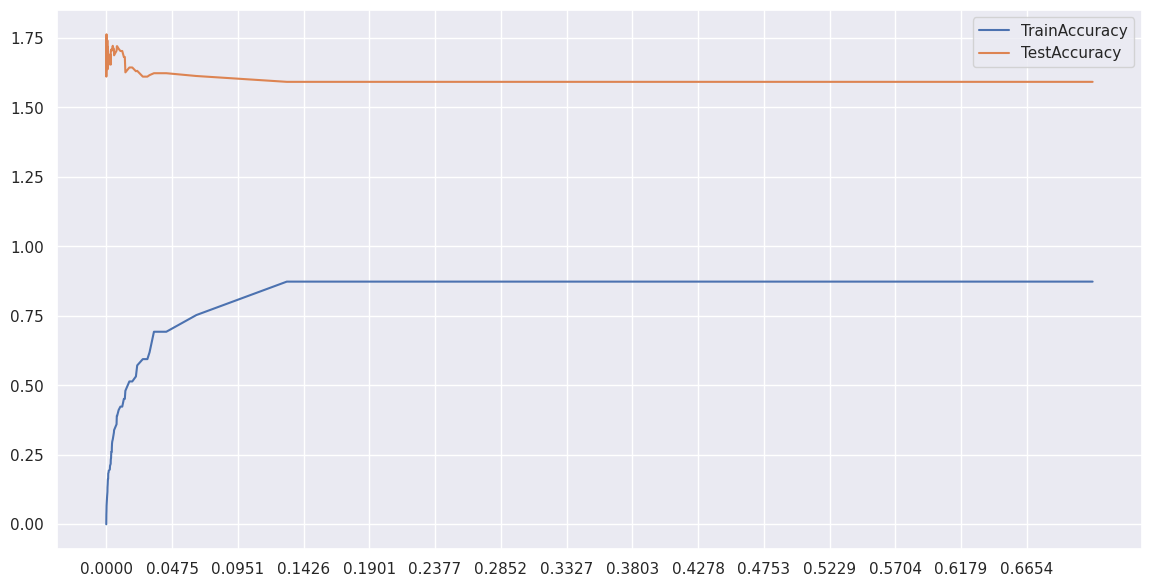

In [18]:
import seaborn as sns
sns.set()
plt.figure(figsize=(14,7))

sns.lineplot(y=accuracy_train,x=alphas,label="TrainAccuracy")

sns.lineplot(y=accuracy_test,x=alphas,label="TestAccuracy")

plt.xticks(ticks=np.arange(0.00,alphas.max(),(alphas.max()-alphas.min())/div))
plt.show()

DecisionTreeRegressor(ccp_alpha=0.095, max_depth=3)

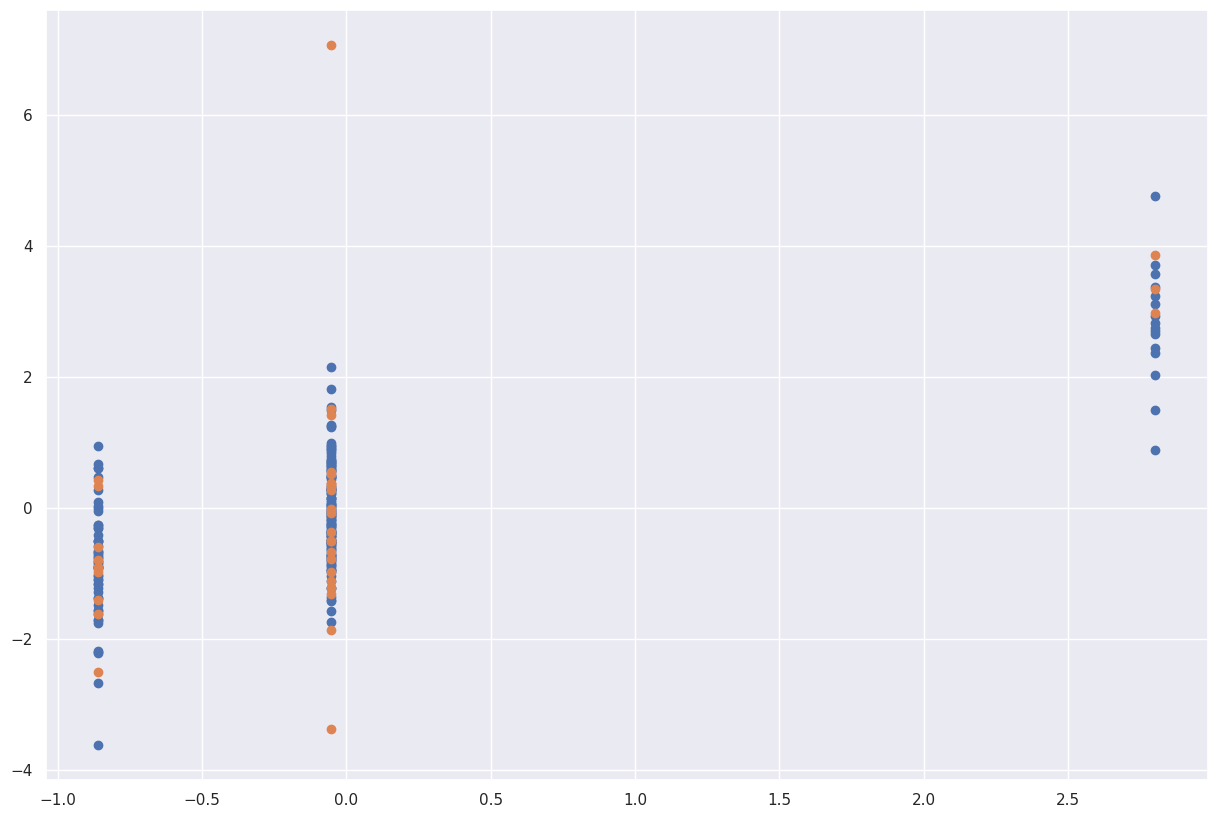

In [19]:
decision_tree_Pas = DecisionTreeRegressor(max_depth=3,ccp_alpha=0.095)  # fill in best max depth here
decision_tree_Pas.fit(XPas_train_full, yPas_train_full)

# Predict values for train and test
train_prediction = decision_tree_Pas.predict(XPas_train_full)
test_prediction = decision_tree_Pas.predict(XPas_test)  #### val o test

# Scatter the predictions vs actual values
plt.scatter(train_prediction, yPas_train_full, label='train')  # blue
plt.scatter(test_prediction, yPas_test, label='test')  # orange
plt.show()

In [20]:
from sklearn import tree

listacaract=list(dfPas_PRES.columns.values)
respuesta=listacaract.pop()
text_representation = tree.export_text(decision_tree_Pas)
print(text_representation)

|--- feature_12 <= 0.50
|   |--- feature_0 <= 0.34
|   |   |--- value: [-0.86]
|   |--- feature_0 >  0.34
|   |   |--- value: [-0.05]
|--- feature_12 >  0.50
|   |--- value: [2.80]



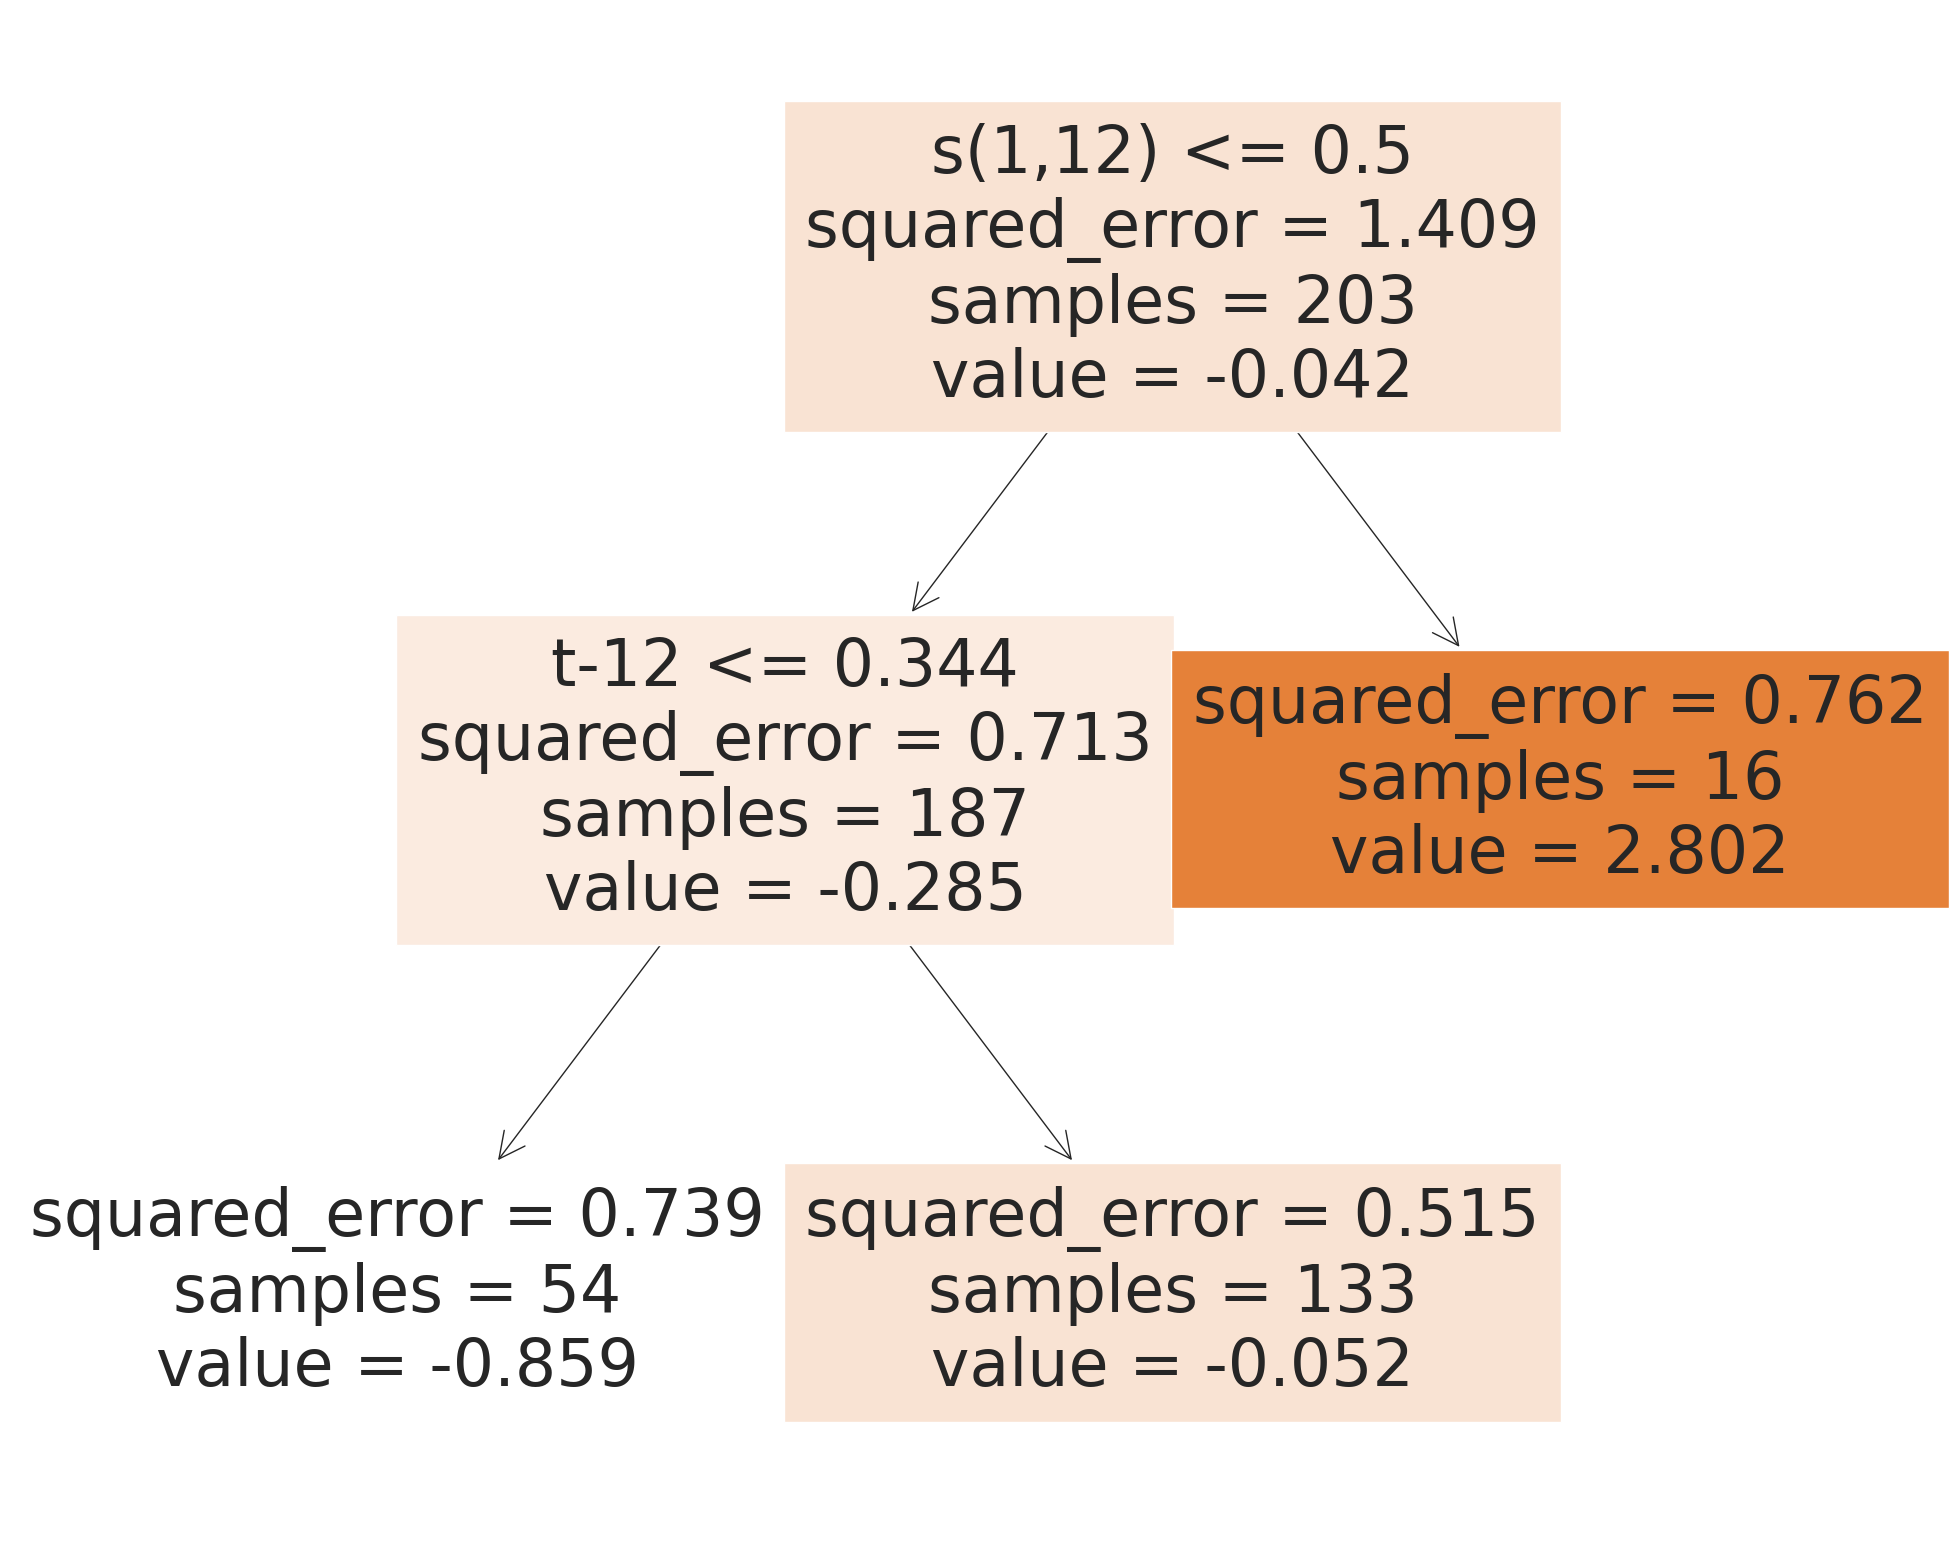

In [21]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(decision_tree_Pas,
                   feature_names=listacaract,
                   class_names=respuesta,
                   filled=True)

**Conjunto de entrenamiento**

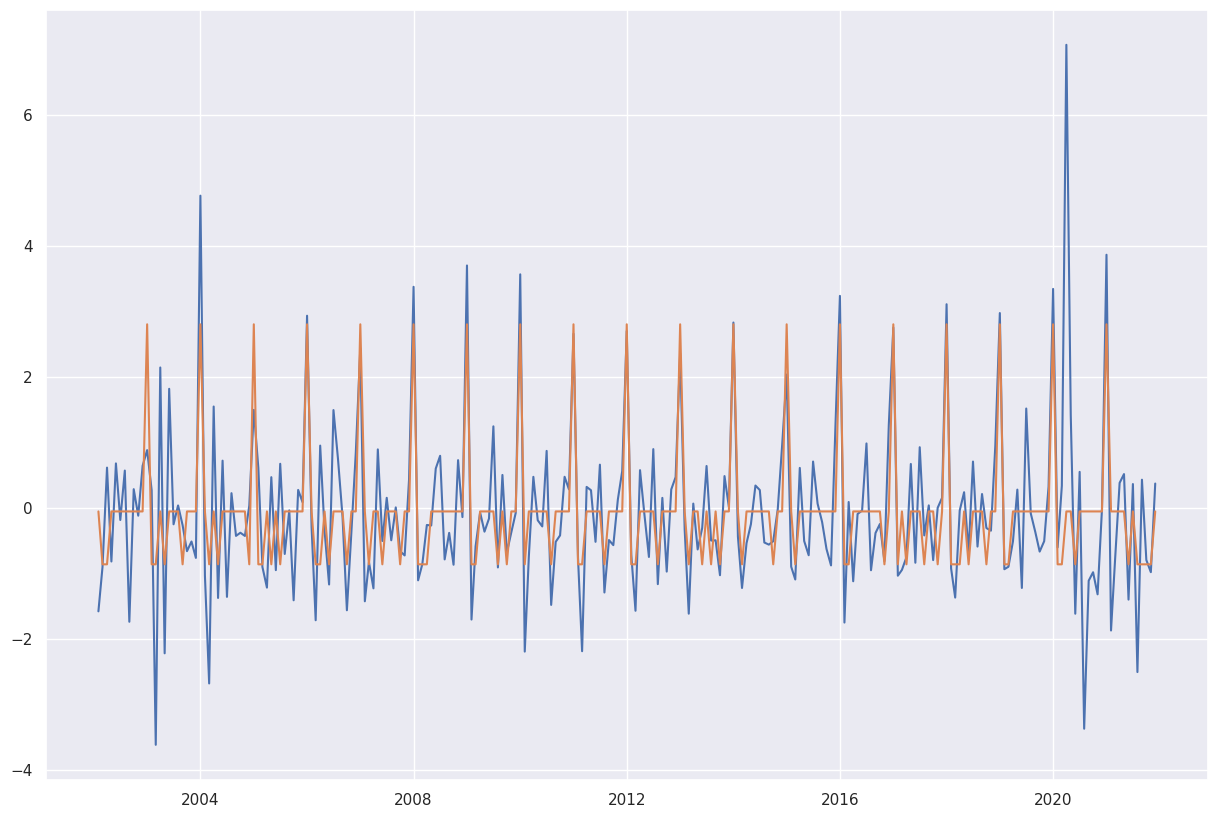

In [22]:
indices_full_Des=DesempsinTend.index

targetjoint=np.concatenate((yPas_train_full,yPas_test))
predictionjoint=np.concatenate((train_prediction,test_prediction))

d = {'observado': targetjoint, 'Predicción': predictionjoint}
ObsvsPred=pd.DataFrame(data=d,index=indices_full_Des[12:])

plt.plot(ObsvsPred)

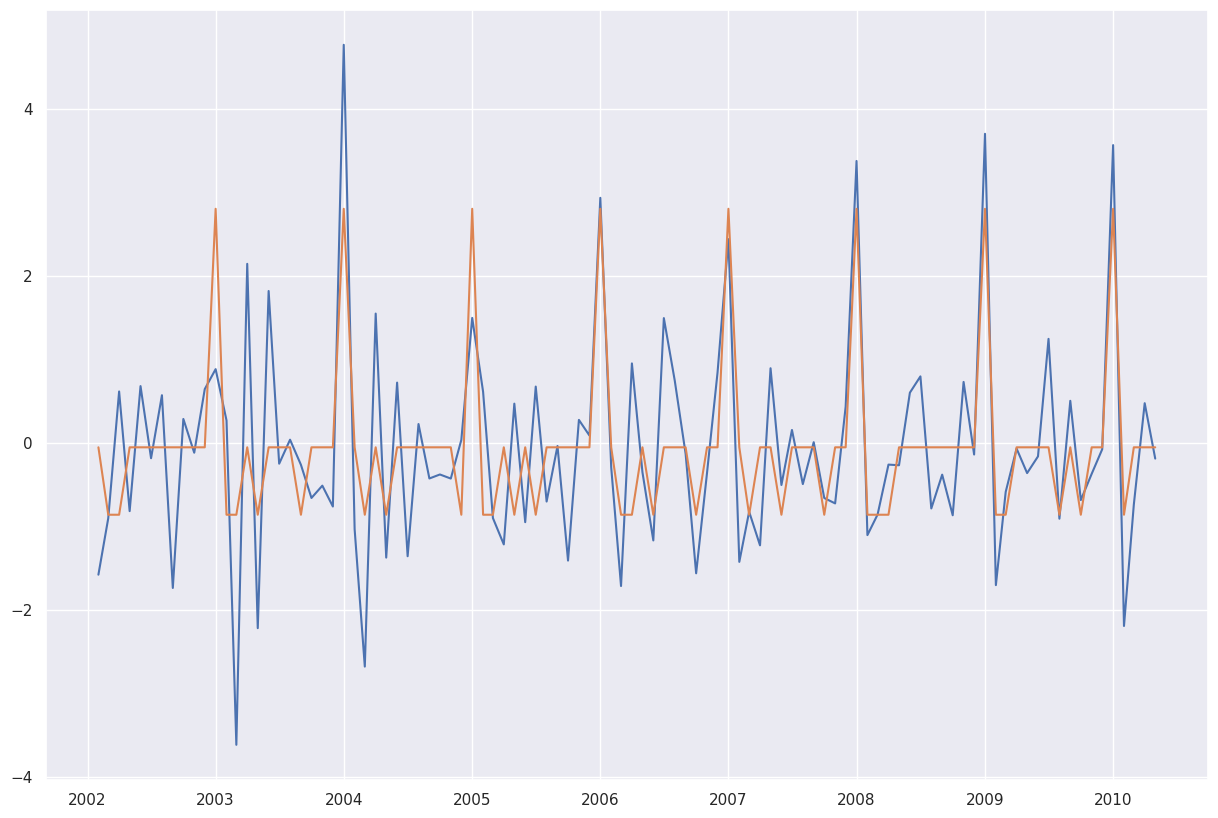

In [23]:
plt.plot(ObsvsPred.iloc[0:100])

In [24]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
fit1 = ExponentialSmoothing(Desempleo, trend='add', seasonal='add',initialization_method="estimated",use_boxcox=False).fit()
plt.figure(figsize=(16, 5.5))

<Figure size 1600x550 with 0 Axes>

<Figure size 1600x550 with 0 Axes>

**Conjunto de prueba**

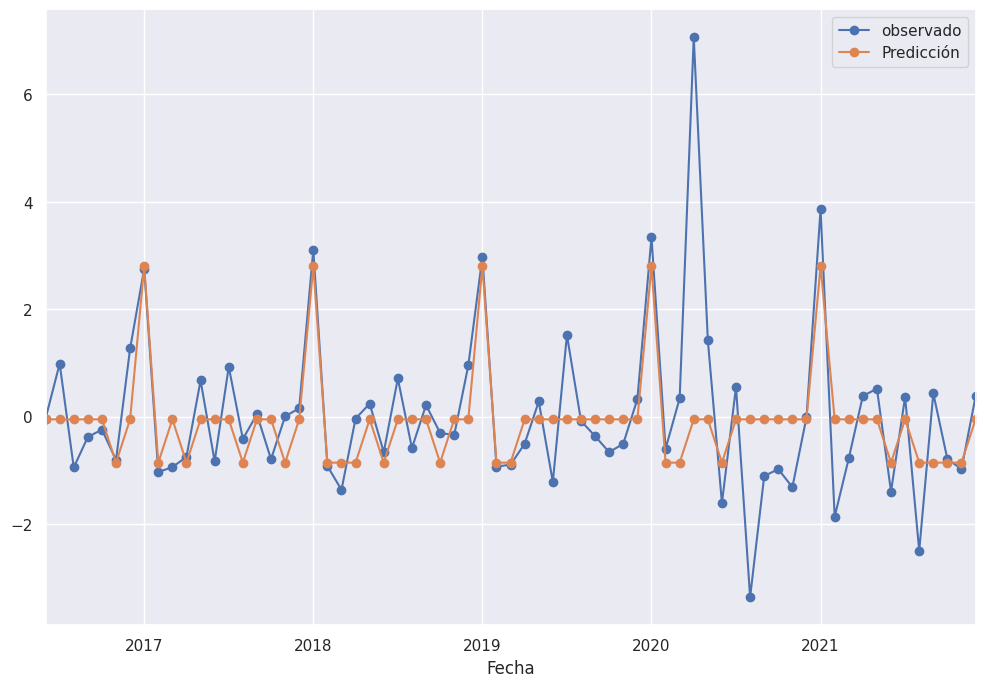

In [25]:
PredPruArboles=ObsvsPred['Predicción'][159:].values+fit1.level[172:].values
PredArboles=ObsvsPred[172:]
ax = PredArboles.plot( marker="o", figsize=(12,8))

Se debe tener en cuenta que al analizar la serie sin tendencia, obtener los valores reales asociados debe tener en cuenta la tendencia. Por eso se estimo con un modelo de suavizamiento exponencial y se suma la tendencia para el calculo del ECM

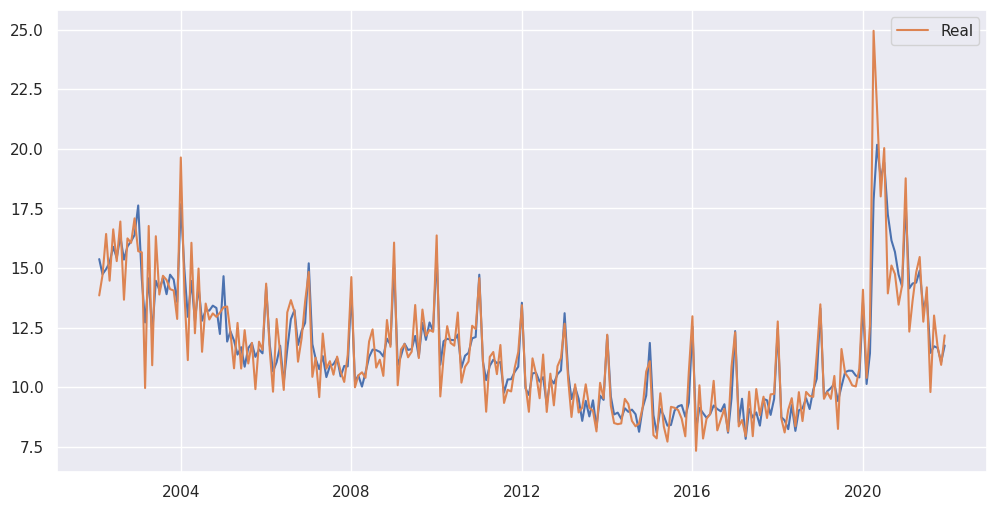

In [26]:
plt.rc('font', size=14)
plt.rc('axes', titlesize=16)
fig, ax = plt.subplots(figsize=(12, 6))
PredEyVArboles=FitModelo1 = ObsvsPred['Predicción']+fit1.level[13:].values
FitModelo2 = ObsvsPred['observado']+fit1.level[13:].values
plt.plot(FitModelo1)
plt.plot(FitModelo2,label='Real')
ax.legend()

In [30]:
ypredes=ObsvsPred['Predicción'][159:]+fit1.level[172:].values
y_testes= ObsvsPred['observado'][159:]+fit1.level[172:].values
RECM = math.sqrt(mean_squared_error(y_testes, ypredes))
RECM

1.1417734617632795

##**Análisis de residuales**


In [31]:
ResidualesPruArboles=y_testes-np.ravel(ypredes)
ypred=train_prediction

In [43]:
ypredes=(ypred+fit1.level[0:203].values)


<ipython-input-45-35452e9915d1>:3: FutureWarning: the 'unbiased'' keyword is deprecated, use 'adjusted' instead.
  plot_acf(ResidualesEyVArboles,lags=32, unbiased=False)


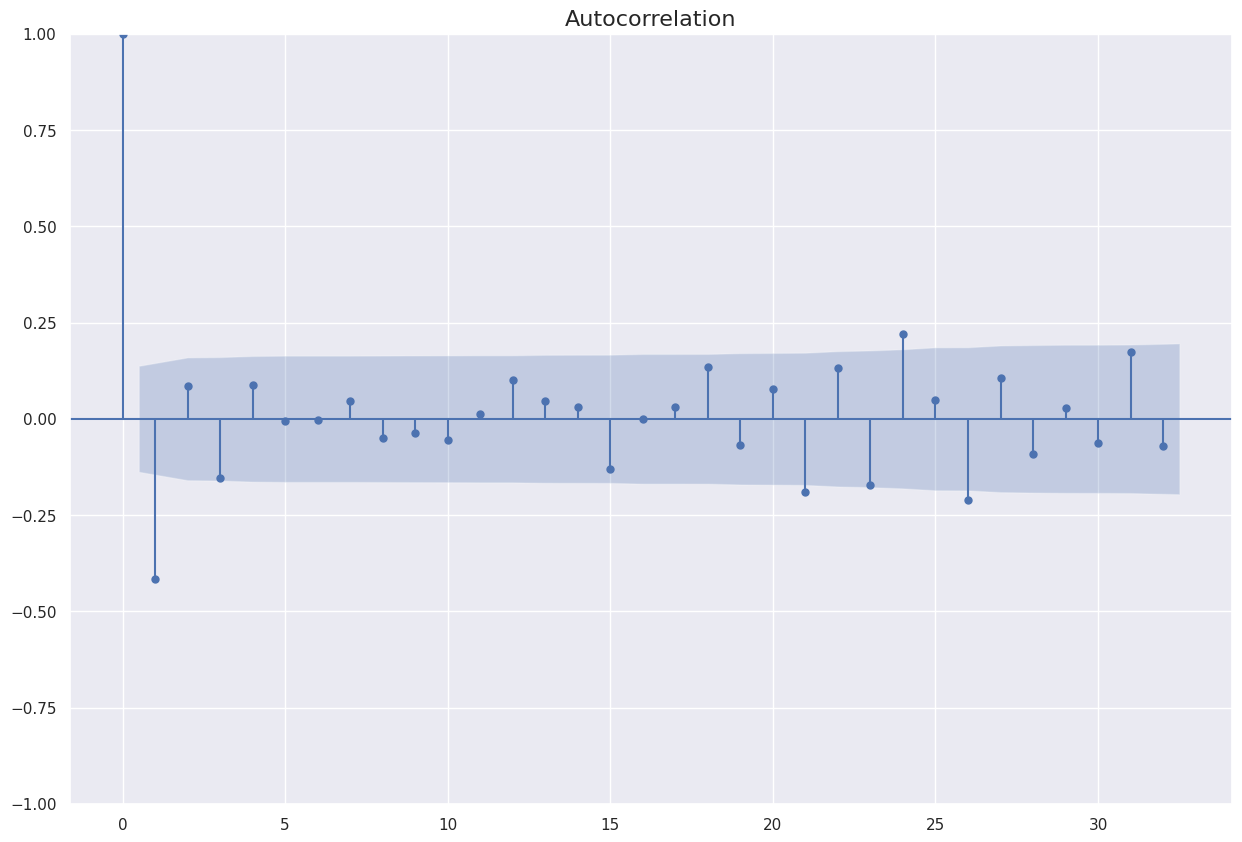

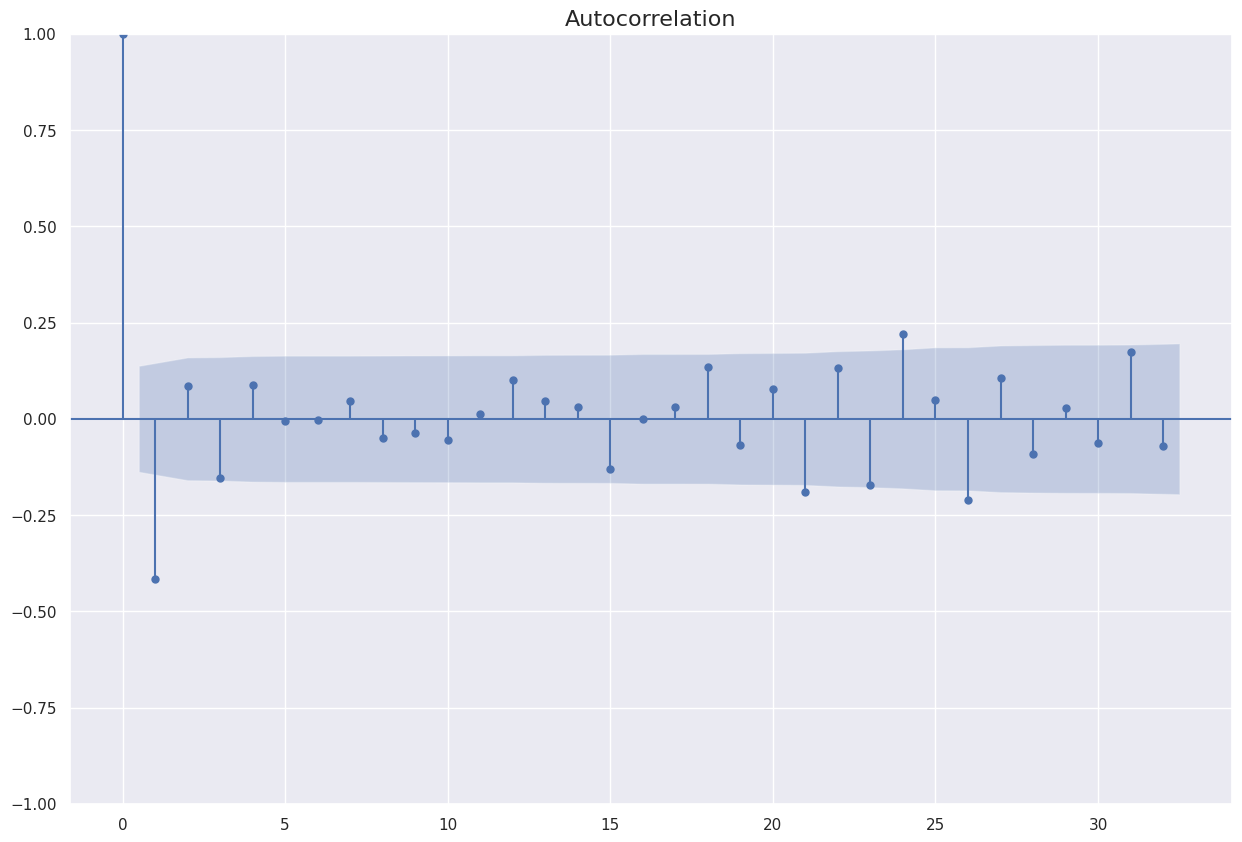

In [45]:
y_testes=(np.ravel(yPas_train_full)+fit1.level[0:203].values)
ResidualesEyVArboles=y_testes-np.ravel(ypredes)
plot_acf(ResidualesEyVArboles,lags=32, unbiased=False)
plt.show()

###***Comparación de capacidad predictiva***

**ECM SARIMA**:7.647692

**ECM REDES NEURONALES**:2.059850

**ECM ÁRBOLES DE DECISIÓN**:1.141